In [1]:
import numpy as np
import DPMechanism as dp
import matplotlib.pyplot as plt
from time import time

# Exponential mechanism

## Classic exponential mechanism

In [2]:
utility_list = [
    ["A", "B", 1],
    ["A", "C", 2],
    ["A", "7", 2],
    ["A", "*", 2],
    ["B", "C", 2],
    ["B", "7", 2],
    ["B", "*", 2],
    ["C", "7", 1],
    ["C", "*", 2],
    ["7", "*", 2]
]
expMech = dp.ExponentialMechanism().set_epsilon(1).set_utility(utility_list)

eResults = {}
for i in range(int(1e5)):
    output = expMech.randomise("C")

    if output not in eResults:
        eResults[output] = 0
    eResults[output] += 1

print(eResults)

{'*': 13509, 'C': 36790, 'A': 13643, '7': 22472, 'B': 13586}


## Hierarchical mechanism
Should give the same output as the classic exponential mechanism above, but with the added benefit of a simpler set-up.

In [3]:
hierMech = dp.HierarchicalMechanism().set_epsilon(1).set_hierarchy([["A", "B"], ["C", "7"], ["*"]])

hResults = {}
for i in range(int(1e5)):
    output = hierMech.randomise("C")

    if output not in hResults:
        hResults[output] = 0
    hResults[output] += 1

print(hResults)

{'*': 13587, 'B': 13761, 'A': 13504, '7': 22259, 'C': 36889}


In [4]:
hierMech.get_utility_list()

[['A', 'B', 1.0],
 ['A', 'C', 2.0],
 ['B', 'C', 2.0],
 ['7', 'A', 2.0],
 ['7', 'B', 2.0],
 ['7', 'C', 1.0],
 ['*', 'A', 2.0],
 ['*', 'B', 2.0],
 ['*', 'C', 2.0],
 ['*', '7', 2.0]]

# Laplace mechanism

In [5]:
lMech = dp.LaplaceMechanism().set_epsilon(6).set_sensitivity(1)

In [6]:
lVals = np.zeros(10000)

for i in range(lVals.size):
    lVals[i] = lMech.randomise(0.5)

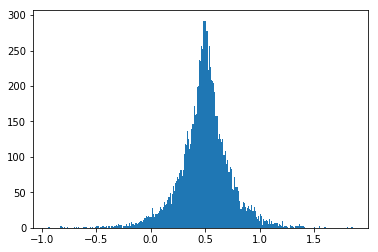

In [7]:
binWidth = 1/100
plt.hist(lVals, bins=np.arange(min(lVals), max(lVals) + binWidth, binWidth))
plt.show()

# Truncated Laplace mechanism

In [8]:
tMech = dp.TruncatedLaplaceMechanism().set_epsilon(6).set_sensitivity(1).set_bounds(0, 1)

In [9]:
tVals = np.zeros(100000)

for i in range(tVals.size):
    tVals[i] = tMech.randomise(0.5)

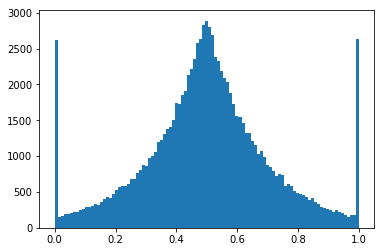

In [10]:
import matplotlib.pyplot as plt

plt.hist(tVals, bins=101)
plt.show()

# Folded Laplace mechanism

In [14]:
fMech = dp.FoldedLaplaceMechanism().set_epsilon(6).set_sensitivity(1).set_bounds(0, 1)

In [15]:
fVals = np.zeros(100000)

for i in range(fVals.size):
    fVals[i] = fMech.randomise(0.5)

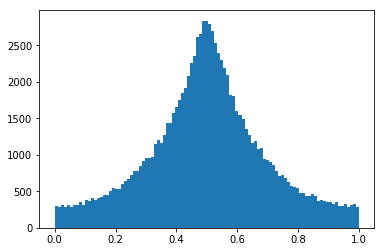

In [16]:
import matplotlib.pyplot as plt

plt.hist(fVals, bins=101)
plt.show()

# Bounded Laplace mechanism

In [17]:
bMech = dp.BoundedLaplaceMechanism().set_epsilon(6).set_bounds(0,1).set_sensitivity(1)

In [18]:
bVals = np.zeros(100000)

for i in range(bVals.size):
    bVals[i] = bMech.randomise(0.5)

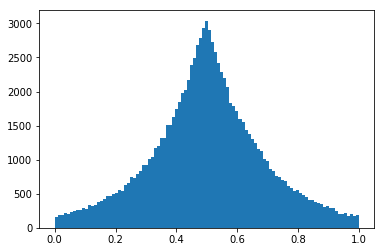

In [19]:
import matplotlib.pyplot as plt

plt.hist(bVals, bins=101)
plt.show()

# Comparison of pure, truncated, folded and bounded mechanisms

Execution times
Pure: 7.103s
Truncated: 9.547s
Folded: 9.244s
Bounded: 17.347s


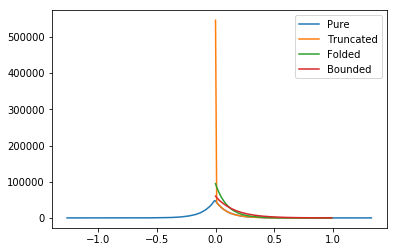

In [20]:
binWidth = 1/101
epsilon = 1
sensitivity = 0.1
upperBound = 1

mechs = [
    (dp.LaplaceMechanism().set_epsilon(epsilon).set_sensitivity(sensitivity), "Pure"),
    (dp.TruncatedLaplaceMechanism().set_epsilon(epsilon).set_sensitivity(sensitivity).set_bounds(0, upperBound), "Truncated"),
    (dp.FoldedLaplaceMechanism().set_epsilon(epsilon).set_sensitivity(sensitivity).set_bounds(0, upperBound), "Folded"),
    (dp.BoundedLaplaceMechanism().set_epsilon(epsilon).set_sensitivity(sensitivity).set_bounds(0, upperBound), "Bounded")
]

print("Execution times")
for (mech, label) in mechs:
    vals = np.zeros(1000000)
    t = time()
    
    for i in range(vals.size):
        vals[i] = mech.randomise(0.0)
    
    valsHist, valsBins = np.histogram(vals, bins=np.arange(min(vals), max(vals) + binWidth, binWidth))
    valsBins = valsBins[:-1]
    plt.plot(valsBins, valsHist, label=label)
    print(label + ": %.3fs" % (time() - t))

    plt.legend()
plt.show()

# Testing the Data Transformer

In [21]:
testMech = dp.BoundedLaplaceMechanism().set_epsilon(1).set_bounds(-0.5, 10.5).set_sensitivity(10)
testMech.randomise(2)

8.332440533171667

In [22]:
testTrans = dp.RoundedInteger(testMech)
testTrans.randomise(2)

3

In [23]:
testVals = np.zeros(100000)

for i in range(testVals.size):
    testVals[i] = testTrans.randomise(2)

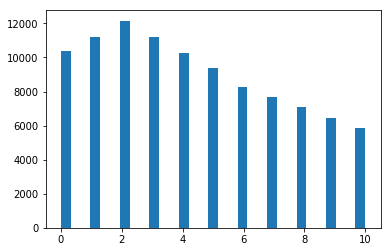

In [24]:
plt.hist(testVals, bins=31)
plt.show()

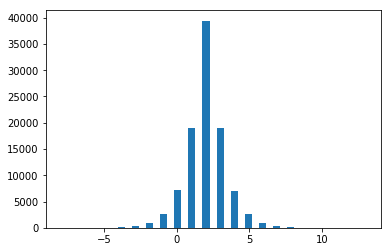

In [25]:
testTrans1b = dp.RoundedInteger(dp.LaplaceMechanism().set_epsilon(1).set_sensitivity(1))
testVals1b = np.zeros(100000)

for i in range(testVals1b.size):
    testVals1b[i] = testTrans1b.randomise(2)
plt.hist(testVals1b, bins=int(testVals1b.max() - testVals1b.min())*2+1)
plt.show()

## Swap Order
In the census data, `cars_or_vans` has the following numeric values:

| Value | Label |
| :---: | --- |
| 1 | One |
| 2 | Two |
| 3 | Three |
| 4 | Four or more |
| 5 | None |

For consistency, we need to swap `None` to value `0` as a preTransform step, and swap it back to `5` in postTransform. This will ensure the Laplace mechanism prioritises values close to zero for an input value `5`. The Laplace mechanism must be initiated while taking the preTransform into account.

In [26]:
class SwapOrder(dp.DPTransformer):
    def preTransform(self, value):
        if value == 5:
            return 0
        return value

    def postTransform(self, value):
        if value == 0:
            return 5
        return value

In [27]:
testTrans2 = SwapOrder(
    dp.RoundedInteger(
        dp.BoundedLaplaceMechanism().set_epsilon(1).set_bounds(-0.5, 4.5).set_sensitivity(4)))

**Note:** Can also be done on a single line,
```Python
testTrans2 = SwapOrder(dp.RoundedInteger(dp.BoundedLaplaceMechanism().set_epsilon(1).set_bounds(-0.5, 10.5).set_sensitivity(10)))
```

In [28]:
testVals2 = np.zeros(100000)

for i in range(testVals2.size):
    testVals2[i] = testTrans2.randomise(4)

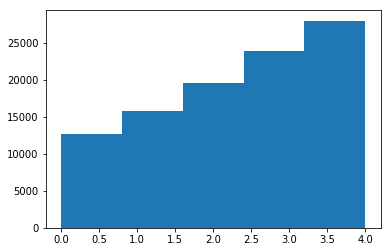

In [29]:
plt.hist(testVals2, bins=5)
plt.show()

# Geometric mechanism
The geometric mechanism is provably optimal when considering discrete inputs/outputs. The graph below shows that the geometric mechanism gives greater probability to the correct value compared to the rounded integer-valued Laplace mechanism.

In [30]:
geomMech = dp.GeometricMechanism().set_epsilon(1).set_sensitivity(1)
geomMech.randomise(2)

2

In [31]:
geomVals = np.zeros(100000)

for i in range(geomVals.size):
    geomVals[i] = geomMech.randomise(2)

In [32]:
geomValsHist = np.histogram(geomVals, bins=np.arange(geomVals.min(), geomVals.max()+1))
laplValsHist = np.histogram(testVals1b, bins = np.arange(testVals1b.min(), testVals1b.max()+1))

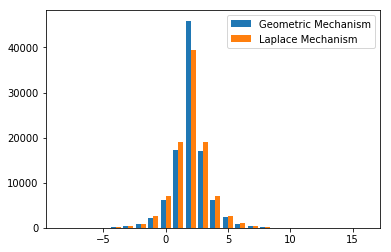

In [33]:
width = 0.4
plt.bar(geomValsHist[1][:-1] - width/2, geomValsHist[0], width, label="Geometric Mechanism")
plt.bar(laplValsHist[1][:-1] + width/2, laplValsHist[0], width, label="Laplace Mechanism")
plt.legend()
plt.show()

In [34]:
def plotDiscreteMech(mechanisms, value, samples=100000):
    width = 0.9/len(mechanisms)
    print("Execution times")
    
    for j, (mech, label) in enumerate(mechanisms):
        vals = np.zeros(samples)
        t = time()

        for i in range(samples):
            vals[i] = mech.randomise(value)

        valsHist, valsBins = np.histogram(vals, bins=np.arange(min(vals), max(vals) + 2))
        valsBins = valsBins[:-1]
        plt.bar(valsBins + width*(0.5 + j - len(mechanisms)/2), valsHist, width, label=label)
        print(label + ": %.3fs" % (time() - t))

        plt.legend()

    plt.savefig("examplfig.pdf")
    # plt.show()

Execution times
Bounded Laplace: 2.867s
Folded Laplace: 1.632s
Folded Geometric: 1.077s


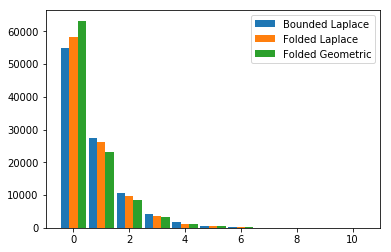

In [35]:
epsilon = 10
upperBound = 10
sensitivity = 10

mechs = [
#     (dp.GeometricMechanism().set_epsilon(epsilon).set_sensitivity(sensitivity), "Pure"),
    (dp.TruncatedGeometricMechanism().set_epsilon(epsilon).set_bounds(0, upperBound).set_sensitivity(sensitivity), "Truncated Geometric"),
    (dp.FoldedGeometricMechanism().set_epsilon(epsilon).set_bounds(-0.5, upperBound + 0.5).set_sensitivity(sensitivity), "Folded Geometric"),
    (dp.RoundedInteger(dp.BoundedLaplaceMechanism().set_epsilon(epsilon).set_sensitivity(sensitivity).set_bounds(-0.5, upperBound + 0.5)), "Bounded Laplace")
]

fmechs = [
    (dp.RoundedInteger(
        dp.BoundedLaplaceMechanism()\
        .set_epsilon(epsilon)\
        .set_bounds(-0.5, upperBound + 0.5)\
        .set_sensitivity(sensitivity)), "Bounded Laplace"),
    (dp.RoundedInteger(
        dp.FoldedLaplaceMechanism()\
        .set_epsilon(epsilon)\
        .set_bounds(-0.5, upperBound + 0.5)\
        .set_sensitivity(sensitivity)), "Folded Laplace"),
    (dp.FoldedGeometricMechanism()\
     .set_epsilon(epsilon)\
     .set_bounds(-0.5, upperBound + 0.5)\
     .set_sensitivity(sensitivity), "Folded Geometric"),
]

plotDiscreteMech(fmechs, 0, 100000)

# Binary mechanism

In [36]:
binLabel1 = "Naoise"
binLabel2 = "Rahul"
binMech = dp.BinaryMechanism().set_epsilon(np.log(9)).set_labels(binLabel1, binLabel2)

In [37]:
bResults = dict.fromkeys([binLabel1, binLabel2], 0)

for i in range(100000):
    output = binMech.randomise(binLabel2)
    bResults[output] += 1
    
bResults

{'Naoise': 10175, 'Rahul': 89825}

# Refactored Geometric mechanism

In [41]:
from random import random, uniform

class newGeometricMechanism(dp.GeometricMechanism):
    def __init__(self):
        super().__init__()
        self.shape = None
        
    def randomise(self, value):
        self.check_inputs(value)
        
        if self.shape is None:
            self.shape = - self.epsilon / self.sensitivity

        u = random() - 0.5 
        u *= 1 + np.exp(self.shape)
        sgn = -1 if u < 0 else 1
        
        return int(value + sgn * np.floor(np.log(sgn * u) / self.shape))

In [42]:
newGeomMech = newGeometricMechanism().set_epsilon(1).set_sensitivity(1)
oldGeomMech = dp.GeometricMechanism().set_epsilon(1).set_sensitivity(1)

In [44]:
newGeomVals = np.zeros(1000000)
oldGeomVals = np.zeros(newGeomVals.size)

tic = time()
newGeomVals = [newGeomMech.randomise(2) for x in newGeomVals]
print("Time (new): %f" % (time() - tic))

tic = time()
oldGeomVals = [oldGeomMech.old_randomise(2) for x in oldGeomVals]
print("Time (old): %f" % (time() - tic))
    
newGeomHist = np.histogram(newGeomVals, bins=np.arange(min(newGeomVals), max(newGeomVals)+1))
oldGeomHist = np.histogram(oldGeomVals, bins=np.arange(min(oldGeomVals), max(oldGeomVals)+1))

Time (new): 8.386240
Time (old): 12.341837


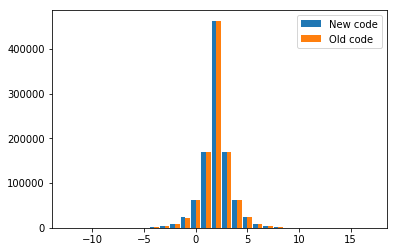

In [45]:
width = 0.45
plt.bar(newGeomHist[1][:-1] - width/2, newGeomHist[0], width, label="New code")
plt.bar(oldGeomHist[1][:-1] + width/2, oldGeomHist[0], width, label="Old code")
plt.legend()
plt.show()

In [46]:
for _vals in [oldGeomHist, newGeomHist]:
    i = np.where(_vals[1]==2)[0][0]
    pred = _vals[0][i] * np.exp(-1)
    print("Prediction: %d, Lower: %d (%f%%), Upper: %d (%f%%)" %\
          (int(pred), _vals[0][i-1], (pred - _vals[0][i-1]) * 100 / pred, 
           _vals[0][i+1], (pred - _vals[0][i+1]) * 100 / pred))
# oldGeomHist[0][i-1], oldGeomHist[0][i] * np.exp(-1), oldGeomHist[0][i+1]

Prediction: 170141, Lower: 170183 (-0.024510%), Upper: 169832 (0.181789%)
Prediction: 170188, Lower: 169664 (0.307906%), Upper: 169520 (0.392518%)


In [47]:
i = np.where(newGeomHist[1]==2)[0][0]
newGeomHist[0][i-1], newGeomHist[0][i] * np.exp(-1), newGeomHist[0][i+1]

(169664, 170188.01919529148, 169520)

In [48]:
oldGeomHist[0], oldGeomHist[0] * np.exp(-1)

(array([     2,      2,      9,     22,     53,    145,    413,   1150,
          3203,   8418,  22790,  62892, 170183, 462492, 169832,  62094,
         23084,   8398,   3093,   1060,    425,    149,     54,     29,
             4,      4]),
 array([7.35758882e-01, 7.35758882e-01, 3.31091497e+00, 8.09334771e+00,
        1.94976104e+01, 5.33425190e+01, 1.51934209e+02, 4.23061357e+02,
        1.17831785e+03, 3.09680914e+03, 8.38397246e+03, 2.31366738e+04,
        6.26068269e+04, 1.70141299e+05, 6.24777013e+04, 2.28431060e+04,
        8.49212902e+03, 3.08945155e+03, 1.13785111e+03, 3.89952208e+02,
        1.56348762e+02, 5.48140367e+01, 1.98654898e+01, 1.06685038e+01,
        1.47151776e+00, 1.47151776e+00]))

In [49]:
newGeomHist[0], newGeomHist[0] * np.exp(-1)

(array([     1,      3,      2,     11,     30,     59,    128,    433,
          1108,   3068,   8553,  23066,  62553, 169664, 462619, 169520,
         62715,  23076,   8437,   3091,   1159,    451,    161,     62,
            18,      8,      2,      1,      0,      1]),
 array([3.67879441e-01, 1.10363832e+00, 7.35758882e-01, 4.04667385e+00,
        1.10363832e+01, 2.17048870e+01, 4.70885685e+01, 1.59291798e+02,
        4.07610421e+02, 1.12865413e+03, 3.14647286e+03, 8.48550719e+03,
        2.30119627e+04, 6.24158975e+04, 1.70188019e+05, 6.23629229e+04,
        2.30715592e+04, 8.48918598e+03, 3.10379885e+03, 1.13711535e+03,
        4.26372272e+02, 1.65913628e+02, 5.92285900e+01, 2.28085254e+01,
        6.62182994e+00, 2.94303553e+00, 7.35758882e-01, 3.67879441e-01,
        0.00000000e+00, 3.67879441e-01]))